## The Dataset:
**Dataset Name:** HR_comma_sep.csv
There are 14,999 employees' data in the dataset, with 10 feature columns. I retrieved the dataset from https://www.kaggle.com/giripujar/hr-analytics?select=HR_comma_sep.csv. 

Pujar, G. (2018). HR Analytics. Kaggle. Retrieved from https://www.kaggle.com/giripujar/hr-analytics?select=HR_comma_sep.csv

In [1]:
#Data exploration and processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Library packages for modeling and evaluation metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, roc_curve, roc_auc_score
import pickle

# Makes graphics look better
sns.set() 

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


The target variable is **left** or employment churn. The categorical variable takes the value 1 for left or 0 for employed.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
#Copying original df to rename column
df_copy = df.copy()
df_copy = df_copy.rename(columns={'average_montly_hours': 'average_monthly_hours'})

In [5]:
#Checking missing data
df_copy.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>,
        <AxesSubplot:title={'center':'number_project'}>],
       [<AxesSubplot:title={'center':'average_monthly_hours'}>,
        <AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>],
       [<AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>,
        <AxesSubplot:>]], dtype=object)

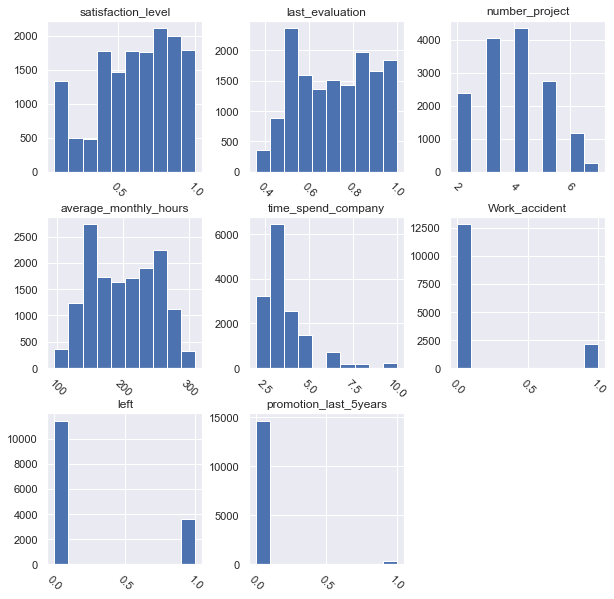

In [6]:
#Histogram of numerical features' distributions
df_copy.hist(figsize=(10,10), xrot=-45)

There are eight numerical features.

<function matplotlib.pyplot.show(close=None, block=None)>

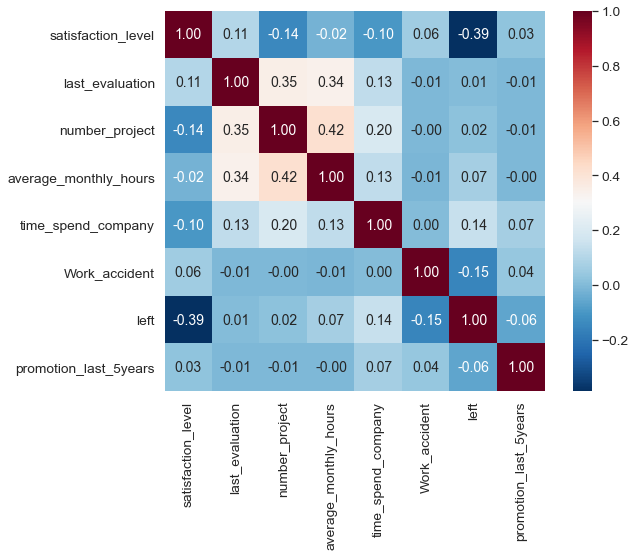

In [7]:
#Correlation heatmap for numerical features
df_corr = df_copy.corr()
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(10,7))
hm = sns.heatmap(df_corr, cbar=True,cmap='RdBu_r', annot=True, square=True, fmt='.2f', annot_kws={'size':14})
plt.show

**Categorical features**

<AxesSubplot:xlabel='left', ylabel='count'>

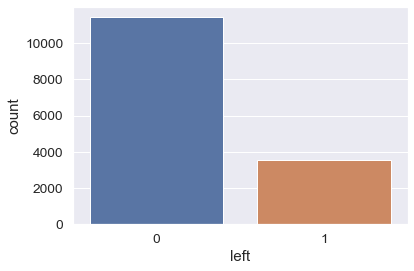

In [8]:
sns.countplot(data=df_copy, x='left')

Majority of the employees remain at the company.

<AxesSubplot:xlabel='salary', ylabel='count'>

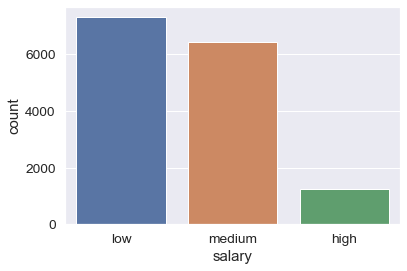

In [9]:
sns.countplot(data=df_copy, x='salary')

<AxesSubplot:xlabel='count', ylabel='salary'>

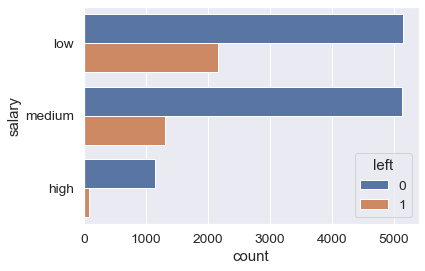

In [10]:
sns.countplot(data=df_copy, y='salary', hue='left')

Out of the salary levels, people with low salaries leave the most. There is a number of people with high salaries who leave.

<AxesSubplot:xlabel='count', ylabel='Department'>

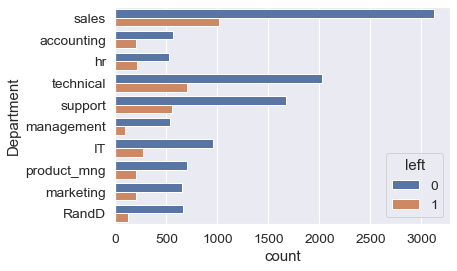

In [11]:
sns.countplot(data=df_copy, y='Department', hue='left')

Sales department has the most employees and the most amount of people who left out of the whole company—this may attribute to dataset imbalance.

<AxesSubplot:xlabel='count', ylabel='Department'>

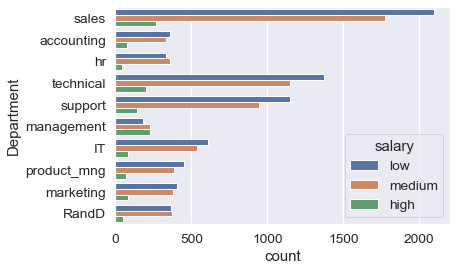

In [12]:
sns.countplot(data=df_copy, y='Department', hue='salary')

Sales is the largest departent and more employees have low salary than high salary. The imbalanced proportion of employee salary will affect the algorithms' performances. 

In [13]:
#Must one-hot encode categorical features including 'Department' and 'salary'
df_copy = pd.get_dummies(df_copy, columns=['Department', 'salary'])


**Univariate EDA**

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

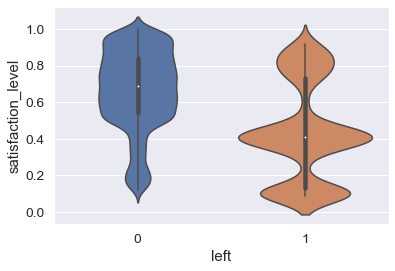

In [14]:
#Satisfaction level and employment status
sns.violinplot(data=df_copy, x='left', y='satisfaction_level')

There were some employees who still left when they had high satisfaction with their job.

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

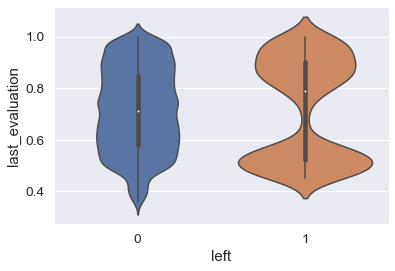

In [15]:
#Last evaluation and employment status
sns.violinplot(data=df_copy, x='left', y='last_evaluation')

Employees receiving highest evaluations may leave to seek other opportunities.

<AxesSubplot:xlabel='left', ylabel='number_project'>

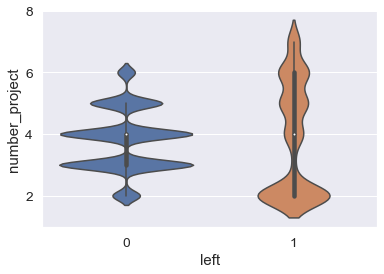

In [16]:
#Number of projects and employment status
sns.violinplot(data=df_copy, x='left', y='number_project')

<AxesSubplot:xlabel='left', ylabel='average_monthly_hours'>

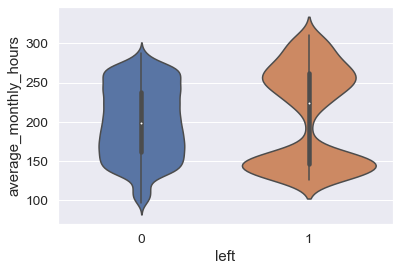

In [17]:
#Average monthly hours and employment status
sns.violinplot(data=df_copy, x='left', y='average_monthly_hours')

Employees who left may had too little or too much number of projects. This is the same for employees who worked too little or too many hours. They may get burn out with their workload.

<AxesSubplot:xlabel='left', ylabel='time_spend_company'>

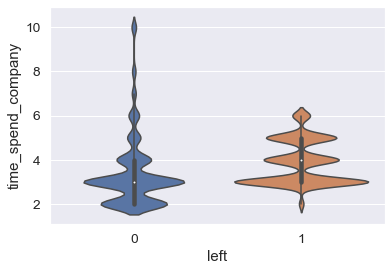

In [18]:
#Duration and employment status
sns.violinplot(data=df_copy, x='left', y='time_spend_company')

A large amount of employees churn after three years of working with the company and people tend to stay after more than six years.

**Bivariate EDA**

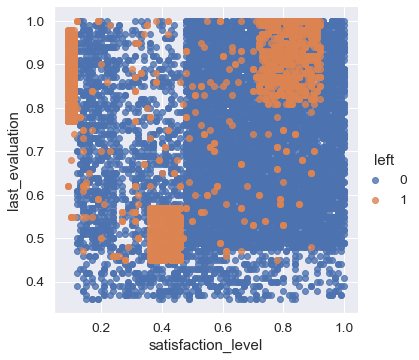

In [19]:
# Work performance and satisfaction of churned employees
sns.lmplot(x='satisfaction_level',y='last_evaluation',data=df_copy, hue= 'left', fit_reg=False)

It is interesting to see how the clusters of those who left show up clearly thanks the the hue. The ones who stay with the company sort of blend in but I can see the consistent range in satisfaction level and evaluation.

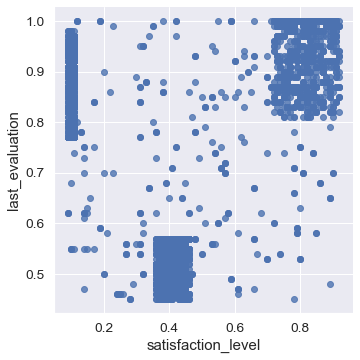

In [20]:
# Work performance and satisfaction of churned employees
sns.lmplot(x='satisfaction_level',y='last_evaluation',data=df_copy[df_copy.left==(1)],fit_reg=False)

Three apparent clusters for churned employees. High evaluation and satisfaction, mediocre satisfaction and evaluation, high evaluation and low satisfaction.

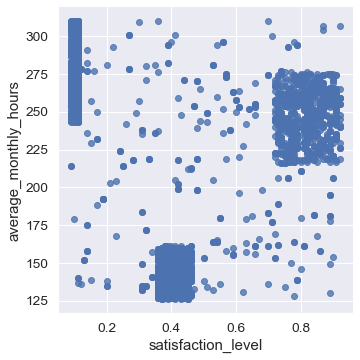

In [21]:
#work hours and satisfaction of churned employees
sns.lmplot(x='satisfaction_level',y='average_monthly_hours',data=df_copy[df_copy.left==(1)],fit_reg=False)

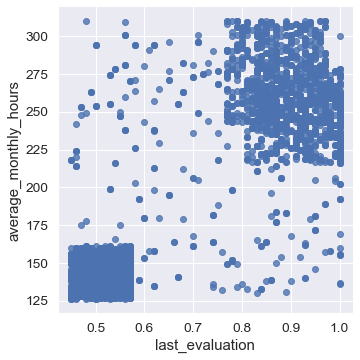

In [22]:
#work hours and satisfaction of churned employees
sns.lmplot(x='last_evaluation',y='average_monthly_hours',data=df_copy[df_copy.left==(1)],fit_reg=False)

One cluster includes those who work less than 175 monthly hours and receive less than 0.6 on their last evaluation. The other cluster includes those who work more than 210 monthly hours

Three clusters of churned employees include:
- low satisfaction (0.2>) and high evaluation (>0.7)
- 0.3 < satisfaction < 0.5 and evaluation < 0.6
- high satisfaction (>0.8) and high evaluation (>0.8)
- low/high evaluation and workload

**Feature Engineering**

In [23]:
#time efficient and high-performing workers
df_copy['efficient'] = ((df_copy.last_evaluation > 0.8) &
                    (df_copy.average_monthly_hours< 225)).astype(int)

#work long hours and high evaluations
df_copy['overachievers'] = ((df_copy.last_evaluation > 0.8) &
                    (df_copy.average_monthly_hours > 225)).astype(int)

#disatisfied and underperforming worker
df_copy['unhappy'] = ((df_copy.last_evaluation > 0.8) &
                    (df_copy.average_monthly_hours< 225)).astype(int)

#satisfied workers putting in a lot of hours
df_copy['workaholics'] = ((df_copy.average_monthly_hours > 250) &
                     (df_copy.satisfaction_level > 0.7)).astype(int)

#disatisfied and overworked 
df_copy['overworked'] = ((df_copy.average_monthly_hours > 250) &
                   (df_copy.satisfaction_level < 0.2)).astype(int)

#highly satisfied workers with high evaluations
df_copy['happy'] = ((df_copy.last_evaluation > 0.8) &
                    (df_copy.satisfaction_level > 0.7)).astype(int)

In [24]:
#Proportion of types of employees who left in the 6 groups
df_copy[['efficient', 'overachievers', 'unhappy',
    'workaholics', 'overworked', 'happy']].mean()

efficient        0.173812
overachievers    0.189479
unhappy          0.173812
workaholics      0.087673
overworked       0.059271
happy            0.186212
dtype: float64

The new features are shown in the table below with 26 columns instead of the original 10 columns (i.e., before one-hot encoding).

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_monthly_hours   14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   Department_IT           14999 non-null  uint8  
 9   Department_RandD        14999 non-null  uint8  
 10  Department_accounting   14999 non-null  uint8  
 11  Department_hr           14999 non-null  uint8  
 12  Department_management   14999 non-null  uint8  
 13  Department_marketing    14999 non-null  uint8  
 14  Department_product_mng  14999 non-null

**Models**
I will work with these classification models to predict whether an employee leaves their job or not including:
- gradient-boosted trees
- random forests
- logistic regression (L1 and L2)

In [26]:
#Splitting data table and dropping target variable 'left'

y = df_copy.left
X = df_copy.drop('left', axis=1)

In [27]:
#Using stratified sampling due to imbalanced data
X_train, X_test, y_train, y_test =train_test_split(X, y, 
                                                   test_size = 0.2,
                                                  random_state=1234,
                                                  stratify=df_copy.left)

Stratify sampling will help with imbalanced datasets. It will help eliminate bias in the test set. The test set will better represent the dataset's employment churn population because the sampling includes data from each group (e.g., department).

In [28]:
#Pipeline object to streamline the model training process
pipelines = {
    'gb' : make_pipeline(GradientBoostingClassifier(random_state=123)),
    'rf' : make_pipeline(RandomForestClassifier(random_state=123)),
    'l1' : make_pipeline(StandardScaler(),LogisticRegression(penalty='l1', solver = 'liblinear', random_state=123)),
    'l2' : make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=123))
}

Using pipelines organize the code better, eliminating chunks of code I had previously written separately.

In [29]:
#Hyperparameter tuning for gradient-boosted tree
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
}

Gradient boosting consists of tuning the number of estimators, maximum number of features, and minimum number of samples to be a leaf.

In [30]:
#Hyperparameter tuning for random forest
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5, 10]
}

For the random forest, there will be 100 to 200 number of estimators, the max number of features to consider during a split, and the minimum number of samples to be a leaf.

In [31]:
l1_hyperparameters = {'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
l2_hyperparameters = {'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}

The hyperparameters of the two logistic regression models differs in the regularization.

In [32]:
hyperparameter = {
    'gb' : gb_hyperparameters,
    'rf' : rf_hyperparameters,
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters
}

In [33]:
#Fit and tune models with GridSearchCV
fit_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline,
                        hyperparameter[name],
                        cv=10,
                        n_jobs=-1)
    model.fit(X_train, y_train)
    fit_models[name] = model


Fit models in a concise manner like I did with convolution models.

**Evaluation Metrics**

In [34]:
#Cross-validation scores using only training data
for name, model in fit_models.items():
    print(name, model.best_score_)

gb 0.9899161106477621
rf 0.991332985821518
l1 0.8864064498192938
l2 0.886489783152627


Cross-validation scores give me an estimate of how each model's performance. Random forest has the highest score so it may be the highest performing model. Perhaps a high score because dataset has more employed workers than the number that left. Precision and recall metrics are more appropriate in this case.

Results for gb
[[2277    9]
 [  19  695]]
Accuracy: 0.9906666666666667
Precision: 0.9872159090909091
Recall: 0.9733893557422969
F1: 0.9802538787023977
AUROC: 0.9923220381766004
Results for rf
[[2283    3]
 [  18  696]]
Accuracy: 0.993
Precision: 0.9957081545064378
Recall: 0.9747899159663865
F1: 0.9851380042462844
AUROC: 0.9918279210196765
Results for l1
[[2119  167]
 [ 151  563]]
Accuracy: 0.894
Precision: 0.7712328767123288
Recall: 0.788515406162465
F1: 0.7797783933518005
AUROC: 0.9222021266949475
Results for l2
[[2119  167]
 [ 151  563]]
Accuracy: 0.894
Precision: 0.7712328767123288
Recall: 0.788515406162465
F1: 0.7797783933518005
AUROC: 0.9222088660486066


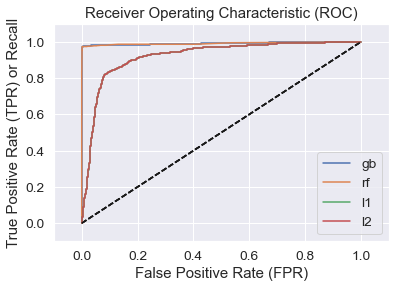

In [35]:
#Evaluation metrics based on test data
for name, model in fit_models.items():
    print('Results for', name)
    
    #gather predictions
    predict = fit_models[name].predict(X_test)
    
    #confusion matrix
    cm = confusion_matrix(y_test, predict)
    print(cm)
    
    #accuracy score
    print('Accuracy:', accuracy_score(y_test, predict))
    
    #precision
    precision = cm[1][1]/(cm[0][1]+cm[1][1])
    print('Precision:', precision)
    
    #recall
    recall = cm[1][1]/(cm[1][0]+cm[1][1])
    print('Recall:', recall)
    
    #F1_score
    print('F1:', f1_score(y_test, predict))
    
    #gather prediction probabilities
    predict = fit_models[name].predict_proba(X_test)
    predict = [p[1] for p in predict]
    
    #ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, predict)
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, label=name)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate (TPR) or Recall')
    plt.xlabel('False Positive Rate (FPR)')
               
    #AUROC score
    print('AUROC:', roc_auc_score(y_test, predict))
               

The AUROC is another standard metric for classification problems. AUROC allows us to measure the effectiveness of the model in distinguishing between classes as well as separating signal from noise.

In [36]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
# Fit train data to GBC
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [37]:
winning_model=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None,
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [38]:
# Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_test, gbc.predict(X_test)))

[[2272   14]
 [  44  670]]


There were 3000 employees in the test set. The gradient boosting model had 670 true positives of those who quit and got 14 wrong; 2272 were correctly identified as employed while 44 were incorrect.

**Feature Importance**

1. satisfaction_level (0.238723)
2. number_project (0.224354)
3. time_spend_company (0.170096)
4. average_monthly_hours (0.094414)
5. overachievers (0.072805)
6. overworked (0.069942)
7. last_evaluation (0.056665)
8. happy (0.040465)
9. Work_accident (0.008741)
10. unhappy (0.005374)
11. salary_low (0.004684)
12. efficient (0.004112)
13. salary_high (0.003827)
14. workaholics (0.002676)
15. promotion_last_5years (0.000582)
16. Department_technical (0.000519)
17. salary_medium (0.000407)
18. Department_RandD (0.000300)
19. Department_product_mng (0.000259)
20. Department_hr (0.000257)
21. Department_accounting (0.000223)
22. Department_IT (0.000152)
23. Department_sales (0.000121)
24. Department_management (0.000117)
25. Department_support (0.000116)
26. Department_marketing (0.000068)


<ipython-input-39-80045e73af29>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


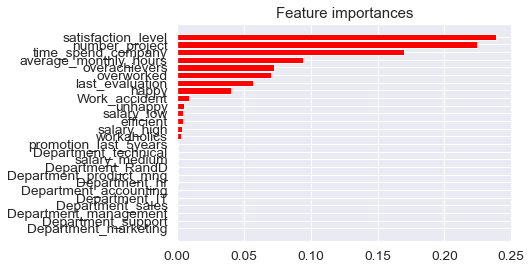

In [39]:
coef = gbc.feature_importances_
ind = np.argsort(-coef)

for i in range(X_train.shape[1]):
    print("%d. %s (%f)" % (i + 1, X.columns[ind[i]], coef[ind[i]]))
    
x = range(X_train.shape[1])
y = coef[ind][:X_train.shape[1]]

plt.title("Feature importances")
ax = plt.subplot()
plt.barh(x, y, color='red')
ax.set_yticks(x)
ax.set_yticklabels(X.columns[ind])
plt.gca().invert_yaxis()

Satisfaction is the strongest predictor of why people choose to quit. Tenure at the company, monthly hours, number of projects followed. Salaries have less importance.

## Analyzing discourse on why people choose to quit their jobs

In [40]:
#Python Reddit API Wrapper (PRAW) to access Reddit's API
!conda install -c conda-forge praw -y

Solving environment: done

# All requested packages already installed.



In [41]:
#Python Reddit API Wrapper (PRAW) to access Reddit's API
import praw
import pandas as pd
import credentials

In [42]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

Version 7.0.0 of praw is outdated. Version 7.5.0 was released Sunday November 14, 2021.


In [43]:
#Subreddit found from search results
co_subreddit = reddit.subreddit('antiwork').hot(limit=10)

In [44]:
#Popular threads
for post in co_subreddit:
    print(post.title, post.score)

Weekly Discussion Thread 44
AMA with the Emergency Workplace Organizing Committee 132
Landed a union job. I'm gonna retire from this place. 12113
How to handle a scumbag that tries to misclassify EMPLOYEES as independent contractors in 3 easy slides! 15156
“15 minutes early is on time, on time is late, late is fired” 7733
CEOs be like 70305
Can confirm this after working in food service 16582
During record inflation and historic wealth inequality congress has yet to investigate CEO pay for price gouging. Instead, they're targeting travel nurse pay and threatening wage caps. 2383
“Job hopping” is ok. Never let anyone tell you otherwise. 4980
I’m a professional juggler. An agent asked me to do a gig below my rate and was not happy i turned her down. Like, girl, just take the L and move on.. 7315


In [45]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}

co_subreddit = reddit.subreddit('antiwork').hot(limit=None)

for post in list(co_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [46]:
co_df = pd.DataFrame(reddit_data)

In [47]:
co_df

,title,link,author,n_comments,score,text
0,Weekly Discussion Thread,/r/antiwork/comments/t6igot/weekly_discussion_...,AutoModerator,147,38,Stickied 'Open mic' thread.\n\nPost anything t...
1,AMA with the Emergency Workplace Organizing Co...,/r/antiwork/comments/t5xjs6/ama_with_the_emerg...,AutoModerator,29,128,Hello antiwork friends! We present an AMA (Ask...
2,Landed a union job. I'm gonna retire from this...,/r/antiwork/comments/t8d5en/landed_a_union_job...,NoSwagStanley86,346,12142,Just started at a new job at a union (USW) cem...
3,How to handle a scumbag that tries to misclass...,/r/antiwork/comments/t8ag2z/how_to_handle_a_sc...,chris_gnarley,647,15167,
4,"“15 minutes early is on time, on time is late,...",/r/antiwork/comments/t87sbw/15_minutes_early_i...,psychonautette,557,7731,So…. Schedule me 15 minutes earlier then? If I...
...,...,...,...,...,...,...
938,Kidnapped my friend,/r/antiwork/comments/t5sflg/kidnapped_my_friend/,jahpizzie,152,10964,A friend of mine worked at Walgreens years ago...
939,Your boss should NEVER get to see a death cert...,/r/antiwork/comments/t5qr7i/your_boss_should_n...,marion_mcstuff,652,20800,EDIT EDIT: Do not use this post to make any ar...
940,I was taking the piss out of how cheesy my bfs...,/r/antiwork/comments/t6ndyz/i_was_taking_the_p...,Viviaana,11,58,
941,2024 is the time for America to run a 3rd part...,/r/antiwork/comments/t6rcyl/2024_is_the_time_f...,rickylong34,18,32,"This is from an outsider looking in, but, most..."


In [48]:
#save disk space through integrating SQLite database with Python
import sqlite3

con = sqlite3.connect("co_reddit.sqlite")
co_df.to_sql('posts', con, if_exists='replace', index=False)

In [49]:
co_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
# it's best to close the connection when finished
con.close()
co_df_check

,title,link,author,n_comments,score,text
0,Weekly Discussion Thread,/r/antiwork/comments/t6igot/weekly_discussion_...,AutoModerator,147,38,Stickied 'Open mic' thread.\n\nPost anything t...
1,AMA with the Emergency Workplace Organizing Co...,/r/antiwork/comments/t5xjs6/ama_with_the_emerg...,AutoModerator,29,128,Hello antiwork friends! We present an AMA (Ask...
2,Landed a union job. I'm gonna retire from this...,/r/antiwork/comments/t8d5en/landed_a_union_job...,NoSwagStanley86,346,12142,Just started at a new job at a union (USW) cem...
3,How to handle a scumbag that tries to misclass...,/r/antiwork/comments/t8ag2z/how_to_handle_a_sc...,chris_gnarley,647,15167,
4,"“15 minutes early is on time, on time is late,...",/r/antiwork/comments/t87sbw/15_minutes_early_i...,psychonautette,557,7731,So…. Schedule me 15 minutes earlier then? If I...
...,...,...,...,...,...,...
938,Kidnapped my friend,/r/antiwork/comments/t5sflg/kidnapped_my_friend/,jahpizzie,152,10964,A friend of mine worked at Walgreens years ago...
939,Your boss should NEVER get to see a death cert...,/r/antiwork/comments/t5qr7i/your_boss_should_n...,marion_mcstuff,652,20800,EDIT EDIT: Do not use this post to make any ar...
940,I was taking the piss out of how cheesy my bfs...,/r/antiwork/comments/t6ndyz/i_was_taking_the_p...,Viviaana,11,58,
941,2024 is the time for America to run a 3rd part...,/r/antiwork/comments/t6rcyl/2024_is_the_time_f...,rickylong34,18,32,"This is from an outsider looking in, but, most..."


In [50]:
co_df[co_df['score'] > 200]

,title,link,author,n_comments,score,text
2,Landed a union job. I'm gonna retire from this...,/r/antiwork/comments/t8d5en/landed_a_union_job...,NoSwagStanley86,346,12142,Just started at a new job at a union (USW) cem...
3,How to handle a scumbag that tries to misclass...,/r/antiwork/comments/t8ag2z/how_to_handle_a_sc...,chris_gnarley,647,15167,
4,"“15 minutes early is on time, on time is late,...",/r/antiwork/comments/t87sbw/15_minutes_early_i...,psychonautette,557,7731,So…. Schedule me 15 minutes earlier then? If I...
5,CEOs be like,/r/antiwork/comments/t818bc/ceos_be_like/,Holzinator007,354,70307,
6,Can confirm this after working in food service,/r/antiwork/comments/t82fre/can_confirm_this_a...,kingcaspr,180,16588,
...,...,...,...,...,...,...
915,Got a call from my boss on my day off,/r/antiwork/comments/t6bn31/got_a_call_from_my...,Human3rr0r919,85,522,"I’m a new employee, when i was hired there was..."
919,Old employer asked me to remove Glassdoor post,/r/antiwork/comments/t5vuft/old_employer_asked...,biloboitroy,298,6094,I worked at a small coffee roastery for a few ...
923,My company announcing Return to office. How in...,/r/antiwork/comments/t5r4il/my_company_announc...,Icy-Ad-1261,2519,59191,
938,Kidnapped my friend,/r/antiwork/comments/t5sflg/kidnapped_my_friend/,jahpizzie,152,10964,A friend of mine worked at Walgreens years ago...


In [51]:
co_df[co_df['score'] > 200]['link'].to_list()

['/r/antiwork/comments/t8d5en/landed_a_union_job_im_gonna_retire_from_this_place/',
 '/r/antiwork/comments/t8ag2z/how_to_handle_a_scumbag_that_tries_to_misclassify/',
 '/r/antiwork/comments/t87sbw/15_minutes_early_is_on_time_on_time_is_late_late/',
 '/r/antiwork/comments/t818bc/ceos_be_like/',
 '/r/antiwork/comments/t82fre/can_confirm_this_after_working_in_food_service/',
 '/r/antiwork/comments/t8bn0g/during_record_inflation_and_historic_wealth/',
 '/r/antiwork/comments/t86qyt/job_hopping_is_ok_never_let_anyone_tell_you/',
 '/r/antiwork/comments/t83yiz/im_a_professional_juggler_an_agent_asked_me_to_do/',
 '/r/antiwork/comments/t86fck/told_my_boss_exactly_how_it_is_story_in_comments/',
 '/r/antiwork/comments/t83ys4/i_can_understand_taking_pride_in_something_you/',
 '/r/antiwork/comments/t7zpab/capitalism_at_its_best/',
 '/r/antiwork/comments/t7zqfd/fuck_anyone_who_pushes_workers_back_to_the_office/',
 '/r/antiwork/comments/t818uh/employer_says_employees_break_times_are_before/',
 '/r/an

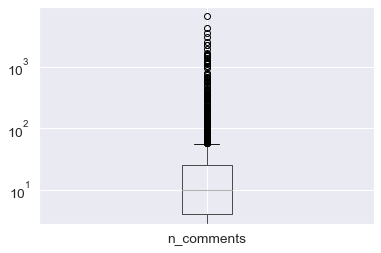

In [52]:
#number of comments
co_df.boxplot('n_comments')
plt.yscale('log')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='score', ylabel='n_comments'>

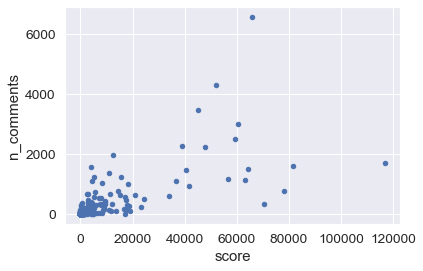

In [53]:
co_df.plot.scatter(x='score', y='n_comments')

In [54]:
conda install -c conda-forge nltk -y

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [55]:
#Natural Language Toolkit for processing text
import nltk

fd = nltk.FreqDist(' '.join(co_df['title']).split())

fd.most_common(20)

[('to', 371),
 ('the', 316),
 ('a', 291),
 ('I', 222),
 ('of', 178),
 ('for', 173),
 ('and', 168),
 ('is', 160),
 ('in', 148),
 ('my', 137),
 ('this', 109),
 ('that', 89),
 ('you', 83),
 ('on', 71),
 ('be', 69),
 ('job', 68),
 ('it', 64),
 ('at', 64),
 ('work', 64),
 ('me', 62)]

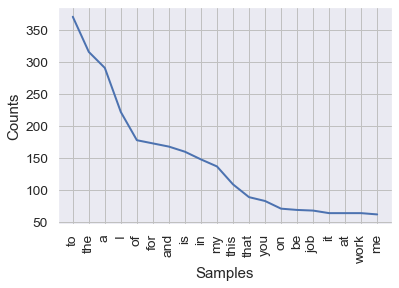

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [56]:
fd.plot(20)

In [57]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christinetran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
words = ' '.join(co_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [60]:
cleaned_df = nltk.FreqDist(cleaned_words)
cleaned_df.most_common(20)

[('work', 79),
 ('job', 75),
 ('people', 50),
 ('pay', 42),
 ('boss', 36),
 ('get', 32),
 ('working', 29),
 ('like', 28),
 ('time', 27),
 ('company', 27),
 ('think', 27),
 ('want', 26),
 ('got', 26),
 ('us', 25),
 ('would', 24),
 ("i'm", 23),
 ('i’m', 23),
 ('workers', 23),
 ('make', 21),
 ('new', 20)]

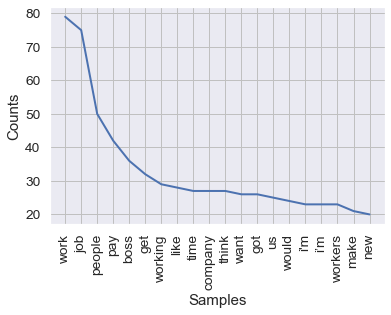

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [61]:
cleaned_df.plot(20)

In [62]:
con = sqlite3.connect('co_reddit.sqlite')
test_df = pd.read_sql_query('SELECT title, n_comments FROM posts;', con)
con.close()
test_df

,title,n_comments
0,Weekly Discussion Thread,147
1,AMA with the Emergency Workplace Organizing Co...,29
2,Landed a union job. I'm gonna retire from this...,346
3,How to handle a scumbag that tries to misclass...,647
4,"“15 minutes early is on time, on time is late,...",557
...,...,...
938,Kidnapped my friend,152
939,Your boss should NEVER get to see a death cert...,652
940,I was taking the piss out of how cheesy my bfs...,11
941,2024 is the time for America to run a 3rd part...,18


**Keyword sentiment**

In [63]:
#Existing sentiment dictionary
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [64]:
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [65]:
sentiment_dict = sentiment_df.to_dict()['score']

In [66]:
title_sentiments = []
for title in test_df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [67]:
test_df['keyword_sentiment'] = title_sentiments

<AxesSubplot:ylabel='Frequency'>

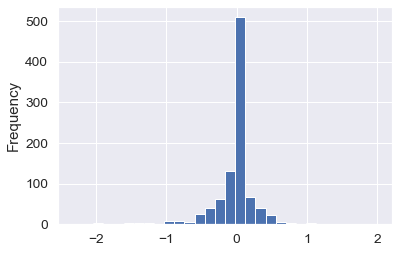

In [68]:
test_df['keyword_sentiment'].plot.hist(bins=30)

In [69]:
test_df['keyword_sentiment'].mean()

-0.04058736801377804

The keyword sentiment found in the titles is on average more negative than positive.

In [70]:
test_df['keyword_sentiment'].std()

0.31005527776761393

In [71]:
test_df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
209,Hate sucking dick,-2.333333
878,fuck chipotle,-2.000000
725,Bullshit Jobs,-2.000000
447,Bullshit jobs,-2.000000
704,Toxic workplace,-1.500000
...,...,...
708,Would be nice,1.000000
49,Health is wealth,1.000000
336,Good for your well-being gift from work,1.000000
678,Good Economy,1.500000


How is "would be nice" used in the context? Seems to be negative and not positive but I would not know for sure unless I read the entire post.

In [72]:
# full titles of the bottom 10 sentiments
test_df.sort_values(by='keyword_sentiment')['title'].to_list()[:10]

['Hate sucking dick',
 'fuck chipotle',
 'Bullshit Jobs',
 'Bullshit jobs',
 'Toxic workplace',
 'Capitalism sucks',
 'Bad recruiting!',
 'Idiot boss',
 'Fuck Salary Expectations',
 'Fuck Sam Walton']

In [73]:
# full titles of the top 10 sentiments
test_df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]

['Congratulations',
 'Good Economy',
 'Health is wealth',
 'Good for your well-being gift from work',
 'Would be nice',
 'Our employee appreciation day gift',
 'The good old days...',
 'CEOs be like',
 'Heroes among us.',
 'I like working']

In [74]:
#for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christinetran/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              943 non-null    object 
 1   n_comments         943 non-null    int64  
 2   keyword_sentiment  943 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.2+ KB


In [77]:
test_df.describe()

,n_comments,keyword_sentiment
count,943.000000,943.000000
mean,87.973489,-0.040587
std,374.969078,0.310055
min,0.000000,-2.333333
25%,4.000000,-0.080816
50%,10.000000,0.000000
75%,25.000000,0.000000
max,6572.000000,2.000000


**Preparation of text for analysis for LDA**
- Elimination of stopwords, punctuation, digits, lowercase

In [78]:
test_df.columns = test_df.columns.str.replace("'"," ")

In [79]:
test_df.describe()

,n_comments,keyword_sentiment
count,943.000000,943.000000
mean,87.973489,-0.040587
std,374.969078,0.310055
min,0.000000,-2.333333
25%,4.000000,-0.080816
50%,10.000000,0.000000
75%,25.000000,0.000000
max,6572.000000,2.000000


In [80]:
test_df.shape

(943, 3)

In [81]:
test_df.isnull().sum()

title                0
n_comments           0
keyword_sentiment    0
dtype: int64

In [82]:
test_df.columns

Index(['title', 'n_comments', 'keyword_sentiment'], dtype='object')

In [83]:
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import warnings
warnings.filterwarnings("ignore")

In [84]:
#Cleaning text data 
#taking a look at the one column I have
test_df['title'].unique()

array(['Weekly Discussion Thread',
       'AMA with the Emergency Workplace Organizing Committee',
       "Landed a union job. I'm gonna retire from this place.",
       'How to handle a scumbag that tries to misclassify EMPLOYEES as independent contractors in 3 easy slides!',
       '“15 minutes early is on time, on time is late, late is fired”',
       'CEOs be like', 'Can confirm this after working in food service',
       "During record inflation and historic wealth inequality congress has yet to investigate CEO pay for price gouging. Instead, they're targeting travel nurse pay and threatening wage caps.",
       '“Job hopping” is ok. Never let anyone tell you otherwise.',
       'I’m a professional juggler. An agent asked me to do a gig below my rate and was not happy i turned her down. Like, girl, just take the L and move on..',
       'Told my boss exactly how it is.. story in comments',
       'I can understand taking pride in something you made but taking pride in being exploi

In [85]:
#adapted from https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have", "ne'er": "never"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
test_df['title']=test_df['title'].apply(lambda x:expand_contractions(x))

In [86]:
#lowercase words
test_df['cleaned']=test_df['title'].apply(lambda x: x.lower())

In [87]:
#remove digits and words containing digits
test_df['cleaned']=test_df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [88]:
#remove puncuations
test_df['cleaned']=test_df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#remove extra spaces
test_df['cleaned']=test_df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [89]:
#how does text look after cleaning
for index,text in enumerate(test_df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 hate how will be more of the same when it comes to i want a raise
Review 2:
 a rare good idea coming from linkedin
Review 3:
 congratulations
Review 4:
 so sad for the psychiatrist and all of us
Review 5:
 you keep using that word i do not think it means what you think it means 


In [90]:
from nltk.corpus import stopwords, words
stop = stopwords.words('english')

test_df['cleaned'] = test_df.cleaned.apply(lambda x: " ".join(w for w in x.split() if w not in stop))
test_df.head(10)

,title,n_comments,keyword_sentiment,cleaned
0,Weekly Discussion Thread,147,0.000000,weekly discussion thread
1,AMA with the Emergency Workplace Organizing Co...,29,-0.285714,ama emergency workplace organizing committee
2,Landed a union job. I am gonna retire from thi...,346,0.000000,landed union job gonna retire place
3,How to handle a scumbag that tries to misclass...,647,-0.294118,handle scumbag tries misclassify employees ind...
4,"“15 minutes early is on time, on time is late,...",557,0.000000,“ minutes early time time late late fired”
5,CEOs be like,354,0.666667,ceos like
6,Can confirm this after working in food service,180,0.000000,confirm working food service
7,During record inflation and historic wealth in...,53,-0.037037,record inflation historic wealth inequality co...
8,“Job hopping” is ok. Never let anyone tell you...,269,0.000000,“job hopping” ok never let anyone tell otherwise
9,I’m a professional juggler. An agent asked me ...,362,0.093750,i’m professional juggler agent asked gig rate ...


In [91]:
#word tokenization to divide text into sequence of words or sentences
tokens = ' '.join(test_df.cleaned).split()
tokens[:20]

['weekly',
 'discussion',
 'thread',
 'ama',
 'emergency',
 'workplace',
 'organizing',
 'committee',
 'landed',
 'union',
 'job',
 'gonna',
 'retire',
 'place',
 'handle',
 'scumbag',
 'tries',
 'misclassify',
 'employees',
 'independent']

In [92]:
#lemmatization converts word to its root word. 
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christinetran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [93]:
test_df['cleaned'] = test_df.cleaned.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
test_df.head(10)

,title,n_comments,keyword_sentiment,cleaned
0,Weekly Discussion Thread,147,0.000000,weekly discussion thread
1,AMA with the Emergency Workplace Organizing Co...,29,-0.285714,ama emergency workplace organizing committee
2,Landed a union job. I am gonna retire from thi...,346,0.000000,landed union job gonna retire place
3,How to handle a scumbag that tries to misclass...,647,-0.294118,handle scumbag try misclassify employee indepe...
4,"“15 minutes early is on time, on time is late,...",557,0.000000,“ minute early time time late late fired”
5,CEOs be like,354,0.666667,ceo like
6,Can confirm this after working in food service,180,0.000000,confirm working food service
7,During record inflation and historic wealth in...,53,-0.037037,record inflation historic wealth inequality co...
8,“Job hopping” is ok. Never let anyone tell you...,269,0.000000,“job hopping” ok never let anyone tell otherwise
9,I’m a professional juggler. An agent asked me ...,362,0.093750,i’m professional juggler agent asked gig rate ...


**Text Analytics**

In [94]:
#text visualization with WordCloud

#generate frequency dictionary for text data
freq = pd.Series(' '.join(test_df.cleaned).split()).value_counts().to_dict()

# although dictionaries are useful data structures, they are had to 'slice-off' specific secions, so we use a list of this
list(freq.items())[:20]

[('work', 113),
 ('job', 111),
 ('people', 55),
 ('pay', 51),
 ('company', 45),
 ('get', 41),
 ('bos', 40),
 ('u', 39),
 ('time', 38),
 ('want', 37),
 ('wage', 35),
 ('year', 34),
 ('working', 32),
 ('hour', 31),
 ('worker', 31),
 ('like', 30),
 ('employee', 30),
 ('think', 29),
 ('would', 28),
 ('employer', 28)]

In [95]:
#remove single letter 'u'
test_df['cleaned'] = test_df.cleaned.apply(lambda x: " ".join(x for x in x.split() if len(x) > 1))

freq = pd.Series(' '.join(test_df.cleaned).split()).value_counts().to_dict()
list(freq.items())[:20]

[('work', 113),
 ('job', 111),
 ('people', 55),
 ('pay', 51),
 ('company', 45),
 ('get', 41),
 ('bos', 40),
 ('time', 38),
 ('want', 37),
 ('wage', 35),
 ('year', 34),
 ('working', 32),
 ('worker', 31),
 ('hour', 31),
 ('like', 30),
 ('employee', 30),
 ('think', 29),
 ('day', 28),
 ('make', 28),
 ('would', 28)]

Top ten words

In [96]:
#The ten least frequent words used
list(freq.items())[-10:]

[('productivity', 1),
 ('teach', 1),
 ('waist', 1),
 ('abyss', 1),
 ('libertarian', 1),
 ('bend', 1),
 ('they’ve', 1),
 ('carbon', 1),
 ('amy', 1),
 ('pound', 1)]

In [97]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq)

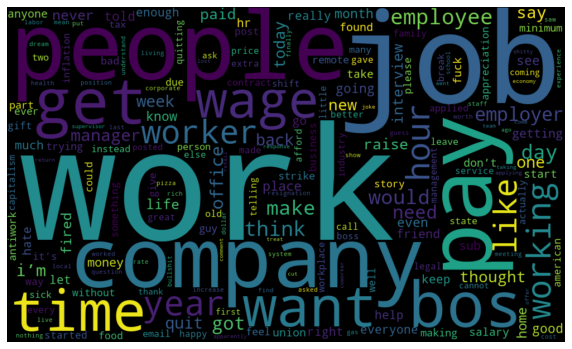

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**N-grams**
- combine multiple words used together. N-grams capture language structure (i.e., what letter or word is likely to follow the given one)
- longer n-gram provide more context to work with. Optimal length of n-gram depends on what we want to 
- create bigrams for the dataset by first tokeni

In [99]:
#regenerate the tokens list, remember we did more data cleaning since we last generated this list
tokens = ' '.join(test_df.cleaned).split()

In [100]:
# creating the bigrams
ngrams_2 = nltk.bigrams(tokens)

# freq distribution for these
freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('minimum', 'wage'), 9),
 (('back', 'office'), 9),
 (('employee', 'appreciation'), 7),
 (('quit', 'job'), 6),
 (('gas', 'price'), 5),
 (('appreciation', 'day'), 5),
 (('mental', 'health'), 5),
 (('new', 'job'), 5),
 (('day', 'week'), 5),
 (('work', 'home'), 5),
 (('year', 'ago'), 5),
 (('spontaneous', 'strike'), 4),
 (('hemont', 'plant'), 4),
 (('remote', 'work'), 4),
 (('getting', 'paid'), 4),
 (('job', 'interview'), 4),
 (('anyone', 'else'), 4),
 (('salary', 'due'), 4),
 (('worker', 'hemont'), 4),
 (('i’m', 'tired'), 4)]

In [101]:
#generate trigrams
ngrams_3 = nltk.trigrams(tokens)

# freq distribution for these
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('worker', 'hemont', 'plant'), 4),
 (('employee', 'appreciation', 'day'), 4),
 (('plant', 'staged', 'spontaneous'), 3),
 (('due', 'sharp', 'collapse'), 3),
 (('nizhnekamsk', 'worker', 'hemont'), 3),
 (('strike', 'paid', 'part'), 3),
 (('salary', 'due', 'sharp'), 3),
 (('part', 'salary', 'due'), 3),
 (('staged', 'spontaneous', 'strike'), 3),
 (('hemont', 'plant', 'staged'), 3),
 (('paid', 'part', 'salary'), 3),
 (('started', 'russia', 'nizhnekamsk'), 3),
 (('russia', 'nizhnekamsk', 'worker'), 3),
 (('spontaneous', 'strike', 'paid'), 3),
 (('walked', 'publicly', 'disrespected'), 2),
 (('“employee', 'appreciation', 'day”'), 2),
 (('applied', 'entry', 'level'), 2),
 (('meeting', 'submitting', 'immediate'), 2),
 (('appreciation', 'day', 'gift'), 2),
 (('without', 'fear', 'fired'), 2)]

## Part of Speech (POS) tagging
- Classify words into the POS and label them accordingly aka POS tagging.

In [102]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/christinetran/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [103]:
#tags associated with POS tagging process
#  'NN' --> singular noun, 'VBG' -->present verb, 'WRB' --> adverb.
from nltk.tag import pos_tag
pos_tags = pos_tag(tokens)
pos_tags[:20]

[('weekly', 'JJ'),
 ('discussion', 'NN'),
 ('thread', 'NN'),
 ('ama', 'NN'),
 ('emergency', 'NN'),
 ('workplace', 'NN'),
 ('organizing', 'VBG'),
 ('committee', 'NN'),
 ('landed', 'VBD'),
 ('union', 'NN'),
 ('job', 'NN'),
 ('gonna', 'VBP'),
 ('retire', 'JJ'),
 ('place', 'NN'),
 ('handle', 'NN'),
 ('scumbag', 'NN'),
 ('try', 'NN'),
 ('misclassify', 'VB'),
 ('employee', 'NN'),
 ('independent', 'JJ')]

In [104]:
#create frequency distribution for parts of speech in dataset
from collections import Counter

Counter([j for i,j in pos_tag(tokens)])

Counter({'JJ': 1119,
         'NN': 2940,
         'VBG': 351,
         'VBD': 347,
         'VBP': 270,
         'VB': 217,
         'IN': 102,
         'RB': 336,
         'NNS': 152,
         'NNP': 26,
         'VBN': 141,
         'JJS': 11,
         'JJR': 17,
         'MD': 47,
         'VBZ': 26,
         'RP': 10,
         'CD': 49,
         'RBR': 12,
         'UH': 2,
         'CC': 8,
         'DT': 16,
         'WP': 4,
         'WRB': 3,
         'FW': 4,
         'WDT': 1})

In [105]:
cleaned_text= test_df['cleaned']

In [106]:
print(len(cleaned_text))

943


In [107]:
fdistribution = nltk.FreqDist(cleaned_text)

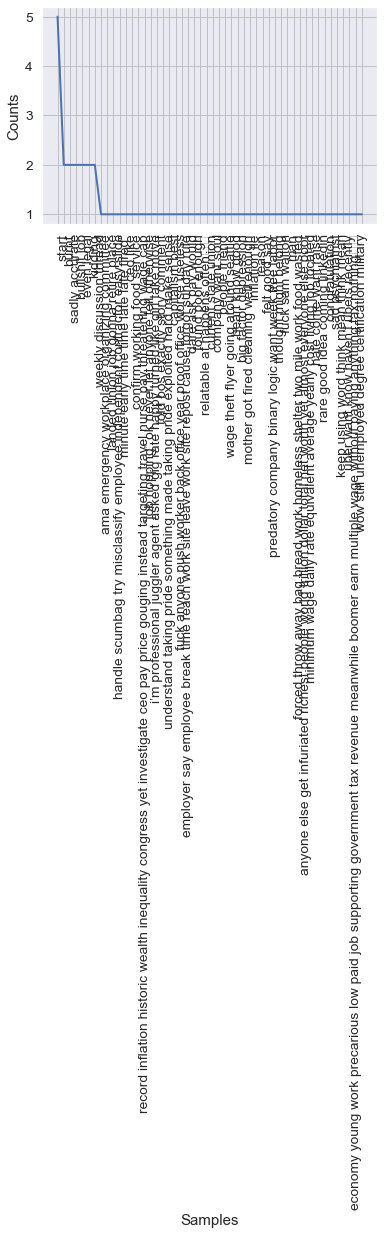

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [108]:
fdistribution.plot(50)

## Sentiment Analysis

In [109]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for sentences in test_df['cleaned']:
    pol_score = sia.polarity_scores(sentences)
    pol_score['words'] = sentences
    results.append(pol_score)
    
pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
df


,neg,neu,pos,compound,words
0,0.000,1.000,0.000,0.0000,weekly discussion thread
1,0.394,0.606,0.000,-0.3818,ama emergency workplace organizing committee
2,0.000,1.000,0.000,0.0000,landed union job gonna retire place
3,0.298,0.496,0.206,-0.3182,handle scumbag try misclassify employee independent contractor easy slide
4,0.000,1.000,0.000,0.0000,minute early time time late late fired”
...,...,...,...,...,...
938,0.000,0.238,0.762,0.4939,kidnapped friend
939,0.106,0.617,0.277,0.4490,bos never get see death certificate take bereavement leave
940,0.131,0.437,0.432,0.7351,taking piss cheesy bfs appreciation day gift turn mine email telling appreciate colleague
941,0.000,0.597,0.403,0.4019,time america run party candidate


In [110]:
#Labeling sentiment
df['label'] = 0
df.loc[df['compound'] > 0.10, 'label'] = 1
df.loc[df['compound'] < -0.10, 'label'] = -1
df.head()

,neg,neu,pos,compound,words,label
0,0.000,1.000,0.000,0.0000,weekly discussion thread,0
1,0.394,0.606,0.000,-0.3818,ama emergency workplace organizing committee,-1
2,0.000,1.000,0.000,0.0000,landed union job gonna retire place,0
3,0.298,0.496,0.206,-0.3182,handle scumbag try misclassify employee independent contractor easy slide,-1
4,0.000,1.000,0.000,0.0000,minute early time time late late fired”,0


In [111]:
#representation of sentiment results

print(df.label.value_counts())

 0    372
 1    308
-1    263
Name: label, dtype: int64


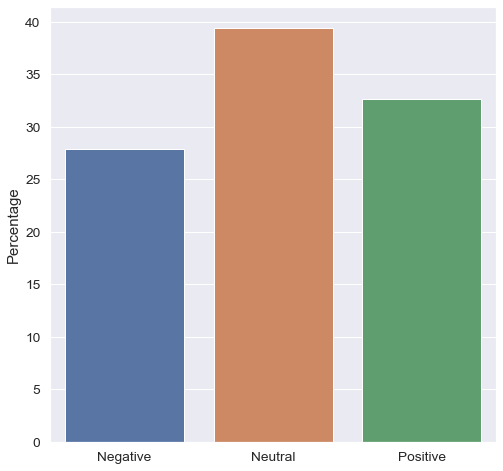

In [112]:
#Visualization of sentiment
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [113]:
#Eliminating neutral column
df_positive_negative = df.loc[df['label'] != 0]
df_positive_negative.head()

,neg,neu,pos,compound,words,label
1,0.394,0.606,0.000,-0.3818,ama emergency workplace organizing committee,-1
3,0.298,0.496,0.206,-0.3182,handle scumbag try misclassify employee independent contractor easy slide,-1
5,0.000,0.286,0.714,0.3612,ceo like,1
7,0.244,0.630,0.126,-0.2500,record inflation historic wealth inequality congress yet investigate ceo pay price gouging instead targeting travel nurse pay threatening wage cap,-1
8,0.000,0.761,0.239,0.2960,“job hopping” ok never let anyone tell otherwise,1


In [114]:
print(df_positive_negative.label.value_counts())

 1    308
-1    263
Name: label, dtype: int64


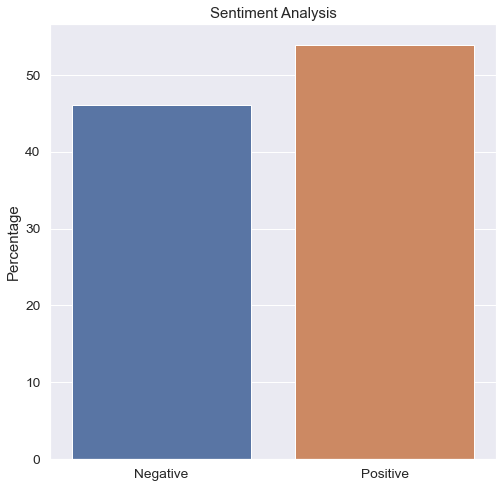

In [115]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df_positive_negative.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")
ax.set_title("Sentiment Analysis")

plt.show()

In [116]:
#positive words in subreddit
positive_words = list(df.loc[df['label'] == 1].words)
print(positive_words)

['ceo like', '“job hopping” ok never let anyone tell otherwise', 'i’m professional juggler agent asked gig rate happy turned like girl take move', 'understand taking pride something made taking pride exploited hard make sense', 'capitalism best', 'people friend', 'heart know good', 'felt good say', 'predatory company binary logic want week free labor', 'rare good idea coming linkedin', 'congratulation', 'uber want know haven’t ubers recently', 'economy young work precarious low paid job supporting government tax revenue meanwhile boomer earn multiple wage without paying anything tax nothing🙄😤', 'wow still unemployed degree certification military', 'health wealth', 'correct type ron swonson libertarian', 'people biden concerned people returning office stimulate business ie getting takeout near office shopping near office etc', 'get phd stem said fun worth said', 'overworked underpaid nurse department worth box tasty cake guess', 'ever think normal people used work say yeah ok either', '

In [117]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [118]:
positive_frequency = FreqDist(positive_words)
pos_freq = positive_frequency.most_common(20)
pos_freq

[('even legal', 2),
 ('kidding', 2),
 ('ceo like', 1),
 ('“job hopping” ok never let anyone tell otherwise', 1),
 ('i’m professional juggler agent asked gig rate happy turned like girl take move',
  1),
 ('understand taking pride something made taking pride exploited hard make sense',
  1),
 ('capitalism best', 1),
 ('people friend', 1),
 ('heart know good', 1),
 ('felt good say', 1),
 ('predatory company binary logic want week free labor', 1),
 ('rare good idea coming linkedin', 1),
 ('congratulation', 1),
 ('uber want know haven’t ubers recently', 1),
 ('economy young work precarious low paid job supporting government tax revenue meanwhile boomer earn multiple wage without paying anything tax nothing🙄😤',
  1),
 ('wow still unemployed degree certification military', 1),
 ('health wealth', 1),
 ('correct type ron swonson libertarian', 1),
 ('people biden concerned people returning office stimulate business ie getting takeout near office shopping near office etc',
  1),
 ('get phd stem 

In [119]:
negative_words = list(df.loc[df['label'] == -1].words)
print(negative_words)

['ama emergency workplace organizing committee', 'handle scumbag try misclassify employee independent contractor easy slide', 'record inflation historic wealth inequality congress yet investigate ceo pay price gouging instead targeting travel nurse pay threatening wage cap', 'fuck anyone push worker back office year proof office worse useless', 'dare ask pay would', 'found poor enough', 'big factor depression', 'mother got fired cleaning well enough', 'fuck sam walton', 'forced throw away bag bread work homeless shelter two mile work food wasted', 'anyone else get infuriated richest people world trillion dollar total net worth yet almost everyone else poor', 'hate come want raise', 'sad psychiatrist', 'belgium formally introduces four day week creates right employee ignore boss hour', 'taco bell ohio cry peril several month', 'sick parent shit', 'stool sitting accident fault', 'capitalism slavery extra step', 'make reality show want see cry', 'went back office day got sexually harassed

In [120]:
negative_frequency = FreqDist(negative_words)
neg_freq = negative_frequency.most_common(20)
neg_freq

[('sadly accurate', 2),
 ('bullshit job', 2),
 ('ama emergency workplace organizing committee', 1),
 ('handle scumbag try misclassify employee independent contractor easy slide',
  1),
 ('record inflation historic wealth inequality congress yet investigate ceo pay price gouging instead targeting travel nurse pay threatening wage cap',
  1),
 ('fuck anyone push worker back office year proof office worse useless', 1),
 ('dare ask pay would', 1),
 ('found poor enough', 1),
 ('big factor depression', 1),
 ('mother got fired cleaning well enough', 1),
 ('fuck sam walton', 1),
 ('forced throw away bag bread work homeless shelter two mile work food wasted',
  1),
 ('anyone else get infuriated richest people world trillion dollar total net worth yet almost everyone else poor',
  1),
 ('hate come want raise', 1),
 ('sad psychiatrist', 1),
 ('belgium formally introduces four day week creates right employee ignore boss hour',
  1),
 ('taco bell ohio cry peril several month', 1),
 ('sick parent sh

In [121]:
Pos_words = [str(p) for p in pos_freq]
Pos_words_string = ' , '.join(Pos_words)

In [122]:
Neg_words = [str(n) for n in neg_freq]
Neg_words_string = ' , '.join(Neg_words)

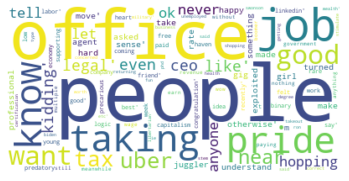

<Figure size 1440x1440 with 0 Axes>

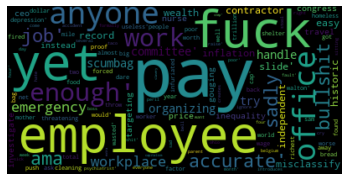

<Figure size 1440x1440 with 0 Axes>

In [123]:
wordcloud_positive = WordCloud(background_color='white').generate(Pos_words_string)
wordcloud_negative = WordCloud().generate(Neg_words_string)

plt.imshow(wordcloud_positive, interpolation = 'bilinear')
plt.axis("off")
plt.figure(figsize=(20, 20))
plt.show()

plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20, 20))
plt.show()



## Topic Modeling with Genism
- unsupervised ML because it does not require predefined list of tags or training data
- counting words and grouping similar word patterns to infer topics within unstructured data
- quickly deduce what texts are talking about

In [124]:
lem_ls = list(test_df.cleaned.apply(lambda x: list(x.split())))
print(lem_ls[:2])

[['weekly', 'discussion', 'thread'], ['ama', 'emergency', 'workplace', 'organizing', 'committee']]


In [140]:
conda install -c conda-forge pyldavis

/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Solving environment: done

## Package Plan ##

  environment location: /Users/christinetran/opt/anaconda3

  added / updated specs:
    - pyldavis


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    funcy-1.17                 |     pyhd8ed1ab_0          30 KB  conda-forge
    pyldavis-3.3.1             |     pyhd8ed1ab_0         114 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         144 KB

The following NEW packages will be INSTALLED:

  funcy              conda-forge/noarch::funcy-1.17-pyhd8ed1ab_0
  pyldavis           conda-forge/noarch::pyldavis-3.3.1-pyhd8ed1ab_0



pyldavis-3.3.1       | 114 KB    | ##################################### | 100% 
funcy-1.17           | 30 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transact

In [141]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
# Gensim
import gensim
import gensim.corpora as corpora

/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
# Create Dictionary
id2word = corpora.Dictionary(lem_ls)

# Term Document Frequency Corpus
#texts = lem_ls
corpus = [id2word.doc2bow(post) for post in lem_ls]

/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
# Build Basic LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [145]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())

[(0, '0.017*"bos" + 0.015*"work" + 0.015*"day" + 0.012*"friend" + 0.010*"hour" + 0.010*"say" + 0.009*"company" + 0.008*"year" + 0.008*"tax" + 0.007*"people"'), (1, '0.020*"make" + 0.011*"company" + 0.010*"think" + 0.009*"let" + 0.009*"price" + 0.009*"money" + 0.008*"year" + 0.008*"also" + 0.008*"work" + 0.008*"right"'), (2, '0.014*"worker" + 0.013*"resignation" + 0.010*"meeting" + 0.009*"got" + 0.009*"bos" + 0.009*"enough" + 0.008*"need" + 0.008*"even" + 0.007*"immediate" + 0.007*"job"'), (3, '0.012*"start" + 0.010*"job" + 0.010*"american" + 0.009*"something" + 0.008*"decided" + 0.007*"contract" + 0.007*"it’s" + 0.006*"capitalism" + 0.006*"one" + 0.006*"offer"'), (4, '0.015*"people" + 0.011*"employee" + 0.011*"wage" + 0.010*"work" + 0.010*"get" + 0.009*"job" + 0.009*"minimum" + 0.009*"raise" + 0.008*"worker" + 0.008*"remote"'), (5, '0.021*"job" + 0.019*"fired" + 0.016*"today" + 0.014*"would" + 0.010*"story" + 0.010*"literally" + 0.009*"boss" + 0.009*"little" + 0.008*"rule" + 0.007*"ad"

/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
#coherence evaluation with c_v
from gensim.models import CoherenceModel

# compute the coherence score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=lem_ls, 
                                     dictionary=id2word, 
                                     coherence='c_v')

# retreive the coherence_scores
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)

/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.48200759395645054


Poor score of 0.456. Now I need to optimize the base model through varying the number of topics and then compare coherence scores

In [147]:
# range of 2 to 15 topics

scores = []
for i in range(2,15):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    # compute the coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    # retreive the coherence_scores
    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))


Calcuting for 2 topics


/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Calcuting for 3 topics
Calcuting for 4 topics
Calcuting for 5 topics
Calcuting for 6 topics
Calcuting for 7 topics
Calcuting for 8 topics
Calcuting for 9 topics
Calcuting for 10 topics
Calcuting for 11 topics
Calcuting for 12 topics
Calcuting for 13 topics
Calcuting for 14 topics


In [148]:
scores

/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(2, 0.32222548918483285),
 (3, 0.38062843122423046),
 (4, 0.4145038586782287),
 (5, 0.4624743812801035),
 (6, 0.45154720626976846),
 (7, 0.4781560746488851),
 (8, 0.4899430733761357),
 (9, 0.45987493233604454),
 (10, 0.4620830569536758),
 (11, 0.4680030513241567),
 (12, 0.4774585121657793),
 (13, 0.4795141201650303),
 (14, 0.4867690534874135)]

It looks like 6 topics does the best for the parameters. I will create the best_fit model below:

In [149]:
#creating a best_fit model based on the coherence score above
bf_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=6, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualize topics
- visualize with pyLDAvis. Good topic models will exhibit equal sized, non-overlapping, bubbles evenly scattered througout the chart
- interactive features on the chart will change as I mouse over the objects in the chart

In [150]:
pip install pyLDAvis==2.1.2

/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pyLDAvis-2.1.2-py2.py3-none-any.whl
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1
Note: you may need to restart the kernel to use updated packages.


In [151]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(bf_lda_model, corpus, id2word)
pyLDAvis.save_html(LDAvis_prepared,'emp_topic_model_viz.html')


/Users/christinetran/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
